In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [4]:

#df=pd.read_csv('/content/drive/My Drive/intrusion detection using deeplearning/intrusion.csv')
df=pd.read_csv("intrusion.csv")

In [5]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [6]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [9]:
df.shape

(494020, 42)

In [10]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:
print('Data set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Data set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 66 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
Name: service, dtype: int64


In [12]:
from sklearn import preprocessing

In [13]:
lab=preprocessing.LabelEncoder()

In [14]:
df['protocol_type']=lab.fit_transform(df['protocol_type'])
df['service']=lab.fit_transform(df['service'])
df['flag']=lab.fit_transform(df['flag'])

In [15]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  int32  
 2   service                      494020 non-null  int32  
 3   flag                         494020 non-null  int32  
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [17]:
df1=df['label']

In [18]:
print('Label distribution Training set:')
print(df['label'].value_counts())

Label distribution Training set:
smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64


In [19]:
newdf=df1.replace({'normal':0,'smurf':1,'neptune':1,'back':1,'satan':2,'ipsweep':2,'portsweep':2,'warezclient': 2,'teardrop': 1,
                  'pod': 1,'nmap' : 2,'guess_passwd': 2,'buffer_overflow': 2,'land': 1,'warezmaster': 2,'imap': 2,'rootkit': 2,
                  'loadmodule': 2,'ftp_write': 2,'multihop': 2,'phf': 2,'perl': 2,'spy': 2})

In [20]:
print(newdf.head())
#newdf.to_csv('label.csv')

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64


In [21]:
df['label'] = newdf
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  int32  
 2   service                      494020 non-null  int32  
 3   flag                         494020 non-null  int32  
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [23]:
df.shape

(494020, 42)

In [25]:
df.to_csv('New_Data.csv')

In [26]:



data=pd.read_csv("New_Data.csv")
#data = pd.read_csv('/content/drive/My Drive/intrusion detection using deeplearning/New_Data.csv')

<Axes: xlabel='label', ylabel='count'>

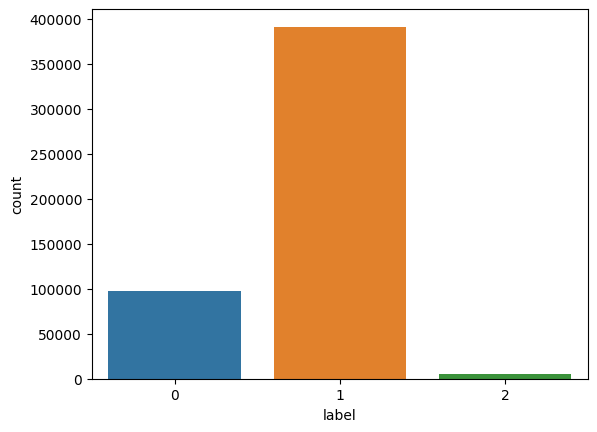

In [28]:
sns.countplot(x='label',data=data)

In [29]:
data.shape

(494020, 43)

# Feature Selection

In [30]:
X = data.iloc[:,data.columns!='label'] 
y = data.iloc[:,data.columns=='label']   

# Split the data 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2, random_state=4)

# LSTM model 

In [33]:
#!pip install keras 

In [34]:
#!pip install absl
!pip3 install absl-py

In [35]:
#from keras.models import sequential 
from tensorflow.keras import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [36]:
model=Sequential()

In [37]:
model.add(LSTM((1),batch_input_shape=(None,None,42),return_sequences=True))

In [38]:
from keras.layers import Reshape
model = Sequential()
model.add(Reshape((42, 1), input_shape=(None, 42, 1)))  # Reshape input to (timesteps, input_dim)
model.add(LSTM(1, return_sequences=False))

In [39]:
model.add(Dense(64, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
#model.fit(xtrain,ytrain,epochs=10,Validation_data=(xtest,ytest))
history=model.fit(xtrain, ytrain, validation_data=(xtest,ytest), batch_size=64, epochs=5)

Epoch 1/5
6176/6176 [==============================] - 65s 10ms/step - loss: 0.2079 - accuracy: 0.9171 - val_loss: 0.1280 - val_accuracy: 0.9503
Epoch 2/5
6176/6176 [==============================] - 61s 10ms/step - loss: 0.1250 - accuracy: 0.9511 - val_loss: 0.1216 - val_accuracy: 0.9528
Epoch 3/5
6176/6176 [==============================] - 61s 10ms/step - loss: 0.1212 - accuracy: 0.9525 - val_loss: 0.1191 - val_accuracy: 0.9536
Epoch 4/5
6176/6176 [==============================] - 59s 10ms/step - loss: 0.1193 - accuracy: 0.9534 - val_loss: 0.1187 - val_accuracy: 0.9534
Epoch 5/5
6176/6176 [==============================] - 65s 11ms/step - loss: 0.1179 - accuracy: 0.9540 - val_loss: 0.1160 - val_accuracy: 0.9547


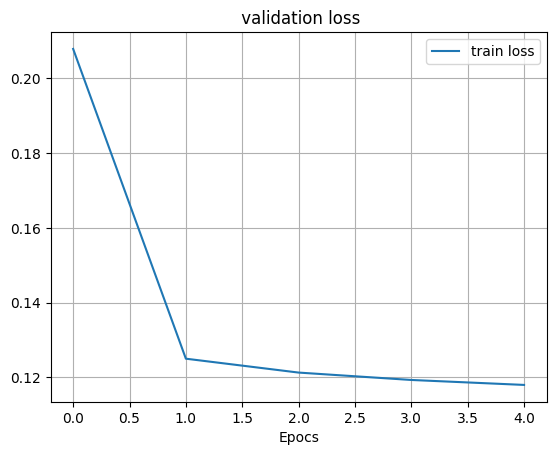

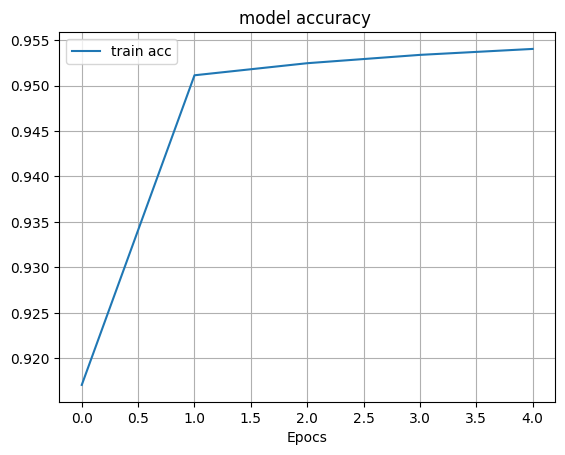

<Figure size 640x480 with 0 Axes>

In [41]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')

plt.legend()
plt.xlabel("Epocs")
plt.title(" validation loss")
plt.grid()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')

plt.legend()
plt.xlabel("Epocs")
plt.title("model accuracy ")
plt.grid()
plt.show()
plt.savefig('AccVal_acc')

In [42]:
results=model.predict(xtest)

3088/3088 [==============================] - 12s 3ms/step


In [43]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest, results)

In [44]:
r2

0.7344506037875271

# CNN Model

In [45]:
#importing the required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [46]:
# Creating the model
model3 = Sequential()

# input layer
model3.add(Dense(400, kernel_initializer = 'uniform', activation = 'relu', input_dim = 42))
model3.add(Dropout(0.5))

# first hidden layer
model3.add(Dense(300,kernel_initializer= 'uniform', activation = 'relu'))
model3.add(Dropout(0.5))

# second hidden layer
model3.add(Dense( 300, kernel_initializer = 'uniform', activation = 'relu'))
model3.add(Dropout(0.5))

# third hidden layer
model3.add(Dense(300,kernel_initializer = 'uniform', activation = 'relu'))
model3.add(Dropout(0.5))

# fourth hidden layer
model3.add(Dense(200, kernel_initializer = 'uniform', activation = 'relu'))
model3.add(Dropout(0.5))

# fifth hidden layer
model3.add(Dense(100,kernel_initializer = 'uniform', activation = 'relu'))
model3.add(Dropout(0.5))

# output layer
model3.add(Dense(1,kernel_initializer= 'uniform',  activation = 'sigmoid'))


In [47]:
# summarizing
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 400)               17200     
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               120300    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               90300     
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 300)              

In [49]:
# compiling the model
hist=model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#model.fit(xtrain,ytrain,epochs=10,Validation_data=(xtest,ytest))
hist=model3.fit(xtrain, ytrain, validation_data=(xtest,ytest), batch_size=10, epochs=25)

Epoch 1/25
39522/39522 [==============================] - 198s 5ms/step - loss: 0.5404 - accuracy: 0.7923 - val_loss: 0.4642 - val_accuracy: 0.7923
Epoch 2/25
39522/39522 [==============================] - 166s 4ms/step - loss: 0.4963 - accuracy: 0.7924 - val_loss: 0.4745 - val_accuracy: 0.7923
Epoch 3/25
39522/39522 [==============================] - 178s 5ms/step - loss: 0.4736 - accuracy: 0.7924 - val_loss: 0.4955 - val_accuracy: 0.7923
Epoch 4/25
39522/39522 [==============================] - 164s 4ms/step - loss: 0.5412 - accuracy: 0.7924 - val_loss: 0.4806 - val_accuracy: 0.7923
Epoch 5/25
39522/39522 [==============================] - 168s 4ms/step - loss: 0.4942 - accuracy: 0.7924 - val_loss: 0.4771 - val_accuracy: 0.7923
Epoch 6/25
39522/39522 [==============================] - 167s 4ms/step - loss: -1.9085 - accuracy: 0.7924 - val_loss: 0.4814 - val_accuracy: 0.7923
Epoch 7/25
39522/39522 [==============================] - 167s 4ms/step - loss: -100.9240 - accuracy: 0.7923 - 

In [50]:
res=model3.predict(xtest)

3088/3088 [==============================] - 4s 1ms/step


In [51]:
from sklearn.metrics import r2_score
re = r2_score(ytest, res)

In [52]:
print(re)

-0.00014813720906947658


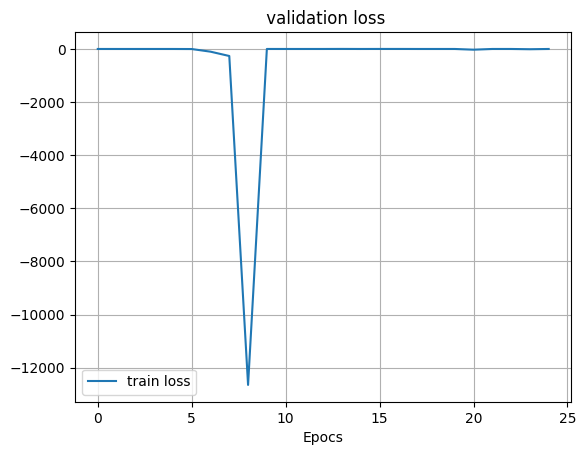

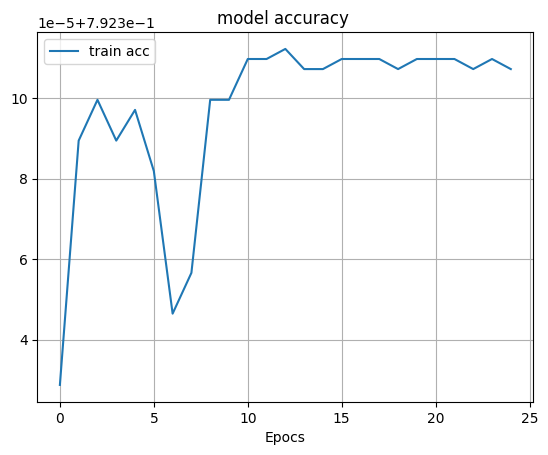

<Figure size 640x480 with 0 Axes>

In [53]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')

plt.legend()
plt.xlabel("Epocs")
plt.title(" validation loss")
plt.grid()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')

plt.legend()
plt.xlabel("Epocs")
plt.title("model accuracy ")
plt.grid()
plt.show()
plt.savefig('AccVal_acc')

In [54]:
a=pd.DataFrame(xtrain)
list(a.columns)
a.values
a

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
391720,391720,0,1,45,5,0,0,0,0,0,...,255,19,0.07,0.06,0.00,0.00,1.0,1.0,0.0,0.0
199749,199749,0,0,14,9,1032,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
481706,481706,0,2,11,9,46,127,0,0,0,...,255,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0
231578,231578,0,0,14,9,1032,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
321240,321240,0,0,14,9,1032,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120705,120705,0,1,45,5,0,0,0,0,0,...,255,6,0.02,0.06,0.00,0.00,1.0,1.0,0.0,0.0
377541,377541,0,1,45,5,0,0,0,0,0,...,255,7,0.03,0.05,0.00,0.00,1.0,1.0,0.0,0.0
485815,485815,0,1,22,9,284,2307,0,0,0,...,13,190,1.00,0.00,0.08,0.05,0.0,0.0,0.0,0.0
467118,467118,0,1,45,1,0,0,0,0,0,...,255,17,0.07,0.05,0.00,0.00,0.0,0.0,1.0,1.0


In [55]:
test=model3.predict(np.array([[391720,	0,	1,	45,	5,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	248,	19,	1.0,	1.0,	0.0,	0.0,	0.08,	0.05,	0.00,	255,	19,	0.07,	0.06,	0.00,	0.00,	1.0,	1.0	,0.0	,0.0]]))
print(test)
if test[0]==1:
    print("intrusion attack Detected")
else:
    print("intrusion not Detected")

1/1 [==============================] - 0s 74ms/step
[[0.8082776]]
intrusion not Detected
